In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('../data/ar_properties.csv')
df

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,7LoZFkSIPOTox0r32ck42Q==,Propiedad,2019-09-15,2019-10-26,2019-09-15,-26.815439,-65.312393,Argentina,Tucumán,Yerba Buena,...,NaN,NaN,NaN,NaN,NaN,Mensual,Terreno - Yerba Buena,Accesos pavimentados.<br>Red subterránea de ag...,Lote,Venta
1,QsZD4OxZInNd5po5LQDRmg==,Propiedad,2019-09-15,9999-12-31,2019-09-15,-26.839469,-65.212790,Argentina,Tucumán,NaN,...,1.0,55.0,41.0,NaN,NaN,Mensual,Departamento - Capital,Detalles constructivos:<br><br>Pisos de porcel...,Departamento,Venta
2,qDtysoUgbnHLp0W9We+8fg==,Propiedad,2019-09-15,2019-09-25,2019-09-15,-31.424820,-64.181225,Argentina,Córdoba,Córdoba,...,1.0,45.0,45.0,NaN,NaN,Mensual,1 DORMITORIO | San Lorenzo al 400,Alquiler temporario de Departamento 1 DORMITOR...,Departamento,Alquiler temporal
3,olj51zV0HFurmaZ78U0ssg==,Propiedad,2019-09-15,2019-09-25,2019-09-15,-31.421242,-64.190798,Argentina,Córdoba,Córdoba,...,1.0,48.0,48.0,NaN,NaN,Mensual,1 DORMITORIO | M. T. de Alvear al 500,Alquiler temporario de Departamento 1 DORMITOR...,Departamento,Alquiler temporal
4,OcS1SAA5oAzjZ3Mzg3XHyg==,Propiedad,2019-09-15,2019-09-25,2019-09-15,-31.426064,-64.180042,Argentina,Córdoba,Córdoba,...,1.0,45.0,45.0,NaN,NaN,Mensual,1 DORMITORIO | Av. Poeta Lugones al 200,Alquiler temporario de Departamento 1 DORMITOR...,Departamento,Alquiler temporal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,ml17bb3zNa945e9dZWrJ6Q==,Propiedad,2020-02-20,2020-04-28,2020-02-20,-38.011919,-57.535854,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,...,5.0,NaN,NaN,750000.0,USD,NaN,CHALET STELLA MARIS,Chalet en dos plantas sobre lote de 1100 m2 y ...,Otro,Venta
999996,O54TyNw4kMogEjaJqWhtLw==,Propiedad,2020-02-20,2020-04-28,2020-02-20,-37.995254,-57.553228,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,...,5.0,NaN,NaN,180000.0,USD,NaN,Venta Dto 4 Amb con Dep Macrocentro,En av. Luro esquina Salta encontramos este am...,Otro,Venta
999997,Y1K0Rl31ib5DwJL5qqCiqg==,Propiedad,2020-02-20,2020-04-28,2020-02-20,-37.983723,-57.544284,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,...,5.0,NaN,NaN,450000.0,USD,NaN,UNICA - HISTORICA - destino comercial,IDEAL DESARROLLO COMERCIAL - Pegado al Unzue -...,Otro,Venta
999998,xZ+W9ufh1Ugj2jPPqWwN8A==,Propiedad,2020-02-20,2020-04-28,2020-02-20,-32.983590,-68.879191,Argentina,Mendoza,Cuadro Benegas,...,5.0,NaN,NaN,500000.0,USD,NaN,CASA EN VENTA-CHACRAS DE CORIA,"Importante propiedad en calle Italia, Chacras ...",Otro,Venta


In [3]:
df['created_on']= pd.to_datetime(df['created_on'])
df['start_date']= pd.to_datetime(df['start_date'])

In [4]:
df

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,7LoZFkSIPOTox0r32ck42Q==,Propiedad,2019-09-15,2019-10-26,2019-09-15,-26.815439,-65.312393,Argentina,Tucumán,Yerba Buena,...,NaN,NaN,NaN,NaN,NaN,Mensual,Terreno - Yerba Buena,Accesos pavimentados.<br>Red subterránea de ag...,Lote,Venta
1,QsZD4OxZInNd5po5LQDRmg==,Propiedad,2019-09-15,9999-12-31,2019-09-15,-26.839469,-65.212790,Argentina,Tucumán,NaN,...,1.0,55.0,41.0,NaN,NaN,Mensual,Departamento - Capital,Detalles constructivos:<br><br>Pisos de porcel...,Departamento,Venta
2,qDtysoUgbnHLp0W9We+8fg==,Propiedad,2019-09-15,2019-09-25,2019-09-15,-31.424820,-64.181225,Argentina,Córdoba,Córdoba,...,1.0,45.0,45.0,NaN,NaN,Mensual,1 DORMITORIO | San Lorenzo al 400,Alquiler temporario de Departamento 1 DORMITOR...,Departamento,Alquiler temporal
3,olj51zV0HFurmaZ78U0ssg==,Propiedad,2019-09-15,2019-09-25,2019-09-15,-31.421242,-64.190798,Argentina,Córdoba,Córdoba,...,1.0,48.0,48.0,NaN,NaN,Mensual,1 DORMITORIO | M. T. de Alvear al 500,Alquiler temporario de Departamento 1 DORMITOR...,Departamento,Alquiler temporal
4,OcS1SAA5oAzjZ3Mzg3XHyg==,Propiedad,2019-09-15,2019-09-25,2019-09-15,-31.426064,-64.180042,Argentina,Córdoba,Córdoba,...,1.0,45.0,45.0,NaN,NaN,Mensual,1 DORMITORIO | Av. Poeta Lugones al 200,Alquiler temporario de Departamento 1 DORMITOR...,Departamento,Alquiler temporal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,ml17bb3zNa945e9dZWrJ6Q==,Propiedad,2020-02-20,2020-04-28,2020-02-20,-38.011919,-57.535854,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,...,5.0,NaN,NaN,750000.0,USD,NaN,CHALET STELLA MARIS,Chalet en dos plantas sobre lote de 1100 m2 y ...,Otro,Venta
999996,O54TyNw4kMogEjaJqWhtLw==,Propiedad,2020-02-20,2020-04-28,2020-02-20,-37.995254,-57.553228,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,...,5.0,NaN,NaN,180000.0,USD,NaN,Venta Dto 4 Amb con Dep Macrocentro,En av. Luro esquina Salta encontramos este am...,Otro,Venta
999997,Y1K0Rl31ib5DwJL5qqCiqg==,Propiedad,2020-02-20,2020-04-28,2020-02-20,-37.983723,-57.544284,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,...,5.0,NaN,NaN,450000.0,USD,NaN,UNICA - HISTORICA - destino comercial,IDEAL DESARROLLO COMERCIAL - Pegado al Unzue -...,Otro,Venta
999998,xZ+W9ufh1Ugj2jPPqWwN8A==,Propiedad,2020-02-20,2020-04-28,2020-02-20,-32.983590,-68.879191,Argentina,Mendoza,Cuadro Benegas,...,5.0,NaN,NaN,500000.0,USD,NaN,CASA EN VENTA-CHACRAS DE CORIA,"Importante propiedad en calle Italia, Chacras ...",Otro,Venta


In [5]:
df1 = df[df.currency == 'USD']
df1

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
44,EWeY8jVhb8ielLeKtfibVw==,Propiedad,2019-09-15,2020-01-20,2019-09-15,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,...,2.0,198.0,150.0,385000.0,USD,Mensual,"Venta. Casa en una planta, 4 amb. con galería ...",MAM.(2) Hermosa propiedad en Barrio San Franci...,Casa,Venta
45,IrEeG8ewIcfLVGSb14kH1w==,Propiedad,2019-09-15,2020-01-20,2019-09-15,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,...,2.0,198.0,150.0,385000.0,USD,Mensual,Venta. Casa en una planta.Lote interno. Barrio...,MAM. Hermosa propiedad en Barrio San Francisco...,Casa,Venta
46,hPuiyAjuBI92uEQdFoY4Fw==,Propiedad,2019-09-15,9999-12-31,2019-09-15,-27.371199,-55.898454,Argentina,Misiones,Posadas,...,2.0,173.0,173.0,195000.0,USD,Mensual,Casa - Posadas,Inmueble centrico ideal para Local comercial ...,Casa,Venta
47,9vIWv494LqC6crAkfpLeDg==,Propiedad,2019-09-15,2020-03-03,2019-09-15,NaN,NaN,Argentina,Santa Fe,Rosario,...,1.0,49.0,40.0,85000.0,USD,Mensual,Cabaña en la Isla sobre riacho Los Marinos - V...,Lote de 20 metros de frente por 130 metros de ...,Casa,Venta
48,aydrtgoZ/frzXDcV20McuA==,Propiedad,2019-09-15,2020-03-03,2019-09-15,-32.951146,-60.571979,Argentina,Entre Ríos,Victoria,...,1.0,49.0,40.0,85000.0,USD,Mensual,Cabaña en la Isla sobre riacho Los Marinos - V...,Lote de 20 metros de frente por 130 metros de ...,Casa,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,ml17bb3zNa945e9dZWrJ6Q==,Propiedad,2020-02-20,2020-04-28,2020-02-20,-38.011919,-57.535854,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,...,5.0,NaN,NaN,750000.0,USD,NaN,CHALET STELLA MARIS,Chalet en dos plantas sobre lote de 1100 m2 y ...,Otro,Venta
999996,O54TyNw4kMogEjaJqWhtLw==,Propiedad,2020-02-20,2020-04-28,2020-02-20,-37.995254,-57.553228,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,...,5.0,NaN,NaN,180000.0,USD,NaN,Venta Dto 4 Amb con Dep Macrocentro,En av. Luro esquina Salta encontramos este am...,Otro,Venta
999997,Y1K0Rl31ib5DwJL5qqCiqg==,Propiedad,2020-02-20,2020-04-28,2020-02-20,-37.983723,-57.544284,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,...,5.0,NaN,NaN,450000.0,USD,NaN,UNICA - HISTORICA - destino comercial,IDEAL DESARROLLO COMERCIAL - Pegado al Unzue -...,Otro,Venta
999998,xZ+W9ufh1Ugj2jPPqWwN8A==,Propiedad,2020-02-20,2020-04-28,2020-02-20,-32.983590,-68.879191,Argentina,Mendoza,Cuadro Benegas,...,5.0,NaN,NaN,500000.0,USD,NaN,CASA EN VENTA-CHACRAS DE CORIA,"Importante propiedad en calle Italia, Chacras ...",Otro,Venta


In [6]:
df1.price_period.value_counts()

price_period
Mensual    260733
Semanal        38
Diario         21
Name: count, dtype: int64

In [7]:
df2 = df1[(df1['price_period'] == "Mensual") & (df1['property_type'] == "Casa")].drop(['id', 'end_date', 'l6'], axis=1)
df2

,ad_type,start_date,created_on,lat,lon,l1,l2,l3,l4,l5,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
44,Propiedad,2019-09-15,2019-09-15,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,NaN,NaN,...,2.0,198.0,150.0,385000.0,USD,Mensual,"Venta. Casa en una planta, 4 amb. con galería ...",MAM.(2) Hermosa propiedad en Barrio San Franci...,Casa,Venta
45,Propiedad,2019-09-15,2019-09-15,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,NaN,NaN,...,2.0,198.0,150.0,385000.0,USD,Mensual,Venta. Casa en una planta.Lote interno. Barrio...,MAM. Hermosa propiedad en Barrio San Francisco...,Casa,Venta
46,Propiedad,2019-09-15,2019-09-15,-27.371199,-55.898454,Argentina,Misiones,Posadas,NaN,NaN,...,2.0,173.0,173.0,195000.0,USD,Mensual,Casa - Posadas,Inmueble centrico ideal para Local comercial ...,Casa,Venta
47,Propiedad,2019-09-15,2019-09-15,NaN,NaN,Argentina,Santa Fe,Rosario,NaN,NaN,...,1.0,49.0,40.0,85000.0,USD,Mensual,Cabaña en la Isla sobre riacho Los Marinos - V...,Lote de 20 metros de frente por 130 metros de ...,Casa,Venta
48,Propiedad,2019-09-15,2019-09-15,-32.951146,-60.571979,Argentina,Entre Ríos,Victoria,NaN,NaN,...,1.0,49.0,40.0,85000.0,USD,Mensual,Cabaña en la Isla sobre riacho Los Marinos - V...,Lote de 20 metros de frente por 130 metros de ...,Casa,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999933,Propiedad,2020-02-20,2020-02-20,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Norte,NaN,NaN,NaN,...,5.0,900.0,400.0,350000.0,USD,Mensual,DIVINA CASA A LA VENTA EN ZÁRATE,"Comodísima casa a la venta en ""El Casco Countr...",Casa,Venta
999934,Propiedad,2020-02-20,2020-02-20,-34.441933,-58.874072,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,NaN,NaN,...,5.0,270.0,270.0,300000.0,USD,Mensual,Casa en venta Mayling Pilar piscina/3dorm/alti...,"Es una casa tradicional con pileta, frente a l...",Casa,Venta
999936,Propiedad,2020-02-20,2020-02-20,-34.465839,-58.615085,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,Pacheco Golf Club,NaN,...,5.0,1000.0,380.0,3000.0,USD,Mensual,CASA EN ALQUILER EN PACHECO GOLF,"Muy buena casa en alquiler en Pacheco Golf""Pl...",Casa,Alquiler
999941,Propiedad,2020-02-20,2020-02-20,-34.435391,-58.646119,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,Nordelta,NaN,...,5.0,800.0,250.0,450000.0,USD,Mensual,IMPECABLE DISEÑOMODERNO Y CALIDAD,"Casa estilo moderno, en excelente lote.Losa ra...",Casa,Venta


In [8]:
df2.dropna(subset=["rooms","surface_total"], inplace=True)
df2

,ad_type,start_date,created_on,lat,lon,l1,l2,l3,l4,l5,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
44,Propiedad,2019-09-15,2019-09-15,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,NaN,NaN,...,2.0,198.0,150.0,385000.0,USD,Mensual,"Venta. Casa en una planta, 4 amb. con galería ...",MAM.(2) Hermosa propiedad en Barrio San Franci...,Casa,Venta
45,Propiedad,2019-09-15,2019-09-15,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,NaN,NaN,...,2.0,198.0,150.0,385000.0,USD,Mensual,Venta. Casa en una planta.Lote interno. Barrio...,MAM. Hermosa propiedad en Barrio San Francisco...,Casa,Venta
46,Propiedad,2019-09-15,2019-09-15,-27.371199,-55.898454,Argentina,Misiones,Posadas,NaN,NaN,...,2.0,173.0,173.0,195000.0,USD,Mensual,Casa - Posadas,Inmueble centrico ideal para Local comercial ...,Casa,Venta
47,Propiedad,2019-09-15,2019-09-15,NaN,NaN,Argentina,Santa Fe,Rosario,NaN,NaN,...,1.0,49.0,40.0,85000.0,USD,Mensual,Cabaña en la Isla sobre riacho Los Marinos - V...,Lote de 20 metros de frente por 130 metros de ...,Casa,Venta
48,Propiedad,2019-09-15,2019-09-15,-32.951146,-60.571979,Argentina,Entre Ríos,Victoria,NaN,NaN,...,1.0,49.0,40.0,85000.0,USD,Mensual,Cabaña en la Isla sobre riacho Los Marinos - V...,Lote de 20 metros de frente por 130 metros de ...,Casa,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999791,Propiedad,2020-02-20,2020-02-20,-34.445836,-58.645468,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,Talar del Lago 1,NaN,...,4.0,282.0,230.0,420000.0,USD,Mensual,Casa en venta en Barrio Cerrado Talar del Lago...,Impecable casa en LOTE INTERNO de 800m2 en la ...,Casa,Venta
999801,Propiedad,2020-02-20,2020-02-20,-34.661302,-58.537474,Argentina,Bs.As. G.B.A. Zona Oeste,La Matanza,Lomas del Mirador,NaN,...,4.0,200.0,200.0,220000.0,USD,Mensual,Casa - Lomas Del Mirador,Casa 3 ambientes con patio - quincho - local -...,Casa,Venta
999811,Propiedad,2020-02-20,2020-02-20,-34.447095,-58.533469,Argentina,Bs.As. G.B.A. Zona Norte,San Fernando,NaN,NaN,...,4.0,841.0,271.0,650000.0,USD,Mensual,Victoria - Casa en Venta USD 650.000 4 dormito...,"Casa moderna en la calle Miguens 2900, Diseño ...",Casa,Venta
999815,Propiedad,2020-02-20,2020-02-20,-34.523908,-58.475507,Argentina,Bs.As. G.B.A. Zona Norte,Vicente López,NaN,NaN,...,4.0,280.0,280.0,840000.0,USD,Mensual,Casa - Vicente López,Excelente chalet 6 amb en dos plantas sobre do...,Casa,Venta


In [9]:
df2.isna().sum()

ad_type                0
start_date             0
created_on             0
lat                 3361
lon                 3361
l1                     0
l2                     0
l3                  1433
l4                 14187
l5                 25195
rooms                  0
bedrooms           18381
bathrooms           1413
surface_total          0
surface_covered     1569
price                  0
currency               0
price_period           0
title                  0
description            2
property_type          0
operation_type         0
dtype: int64

In [10]:
data = df2

# Initialize lists for different types of features
numerical_features = []
categorical_features = []
datetime_features = []

# Classify features based on their data type
for column in data.columns:
    dtype = data[column].dtype
    if dtype == 'object':
        categorical_features.append(column)
    elif dtype == 'datetime64[ns]':
        datetime_features.append(column)
    elif column != 'price':  # Assuming 'price' should be excluded from features
        numerical_features.append(column)

# Pipeline for numeric features: imputation + scaling
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Pipeline for categorical features: imputation + one-hot encoding
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Column transformer to apply the appropriate transformations
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# Complete pipeline including preprocessing and a regressor
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

<Axes: ylabel='Frequency'>

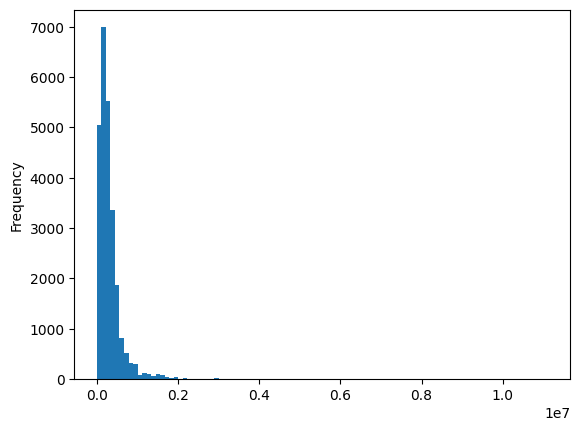

In [30]:
df2.price.plot.hist(bins=100)

In [11]:
X = data.drop('price', axis=1)
y = np.log(data['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

predictions = pipeline.predict(X_test)

In [12]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['lat', 'lon', 'rooms',
                                                   'bedrooms', 'bathrooms',
                                                   'surface_total',
                                                   'surface_covered']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ad_type', 'l1', 'l2', 'l3',
                                                   'l4', 'l5', 'currency',
                                                   'price_period', 'title',
                                                   'description',
                                                   'property_type',
                                                   'operation_type'])])),
                ('regressor', LinearRegression())])

In [13]:
pipeline.score(X_train, y_train)

0.995889502547952

In [14]:
pipeline.score(X_test, y_test)

0.6068535603620094

In [15]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print("Root Mean Square Error (RMSE):", rmse)


Root Mean Square Error (RMSE): 0.8028849059130728
